<a href="https://colab.research.google.com/github/nikishsubedi/Statistical_Analysis/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable 𝑦 and one or more independent variable 𝑥 using best fit line

In case of multiple regression the wquation used is <br> <b>Y =β0 +β1X1 +···+βpXp +ε</b><br> where Y is target variable and X1,X2,...,Xp are set of variables or features.<br> β0 +β1X1 +···+βpXp are predictable variables and ε is unpredictable variable or residual error

We use different fitting procedures so that we can achieve better prediction accuracy and model interpretability.<br> THere are different classes of methods:<br>
- Subset Selection
- Shrinkage
- Dimension Reduction

# Subset Selection

Subset selection methods aim to identify a subset of predictors (features) that are most <br>relevant for predicting the response variable.It can help improve prediction accuracy by <br>selecting the most informative features, thereby reducing overfitting and improving model <br>interpretability by focusing on a smaller set of predictors.<br> The two main approaches for subset selection are:
1. Best Subset Selection
2. Stepwise Selection

## Best Subset Selection

Best subset selection is an exhaustive search approach that considers all possible subsets of features. It starts with the empty set and then adds features one at a time, evaluating the performance of each model on a set.

Algorithm of best subset selection:<br>
1. Let M0 denote the null model, which contains no predictors. This model simply predicts the sample mean for each observation.
2. For k = 1,2,...p:
  * Fit all 'kp' models that contain exactly k predictors.
  * Pick the best among these 'kp' models, and call it Mk. Here best is defined as having the smallest RSS, or equivalently largest R2.
3. Select a single best model from among M0, . . . , Mp using cross-validated prediction error, Cp (AIC), BIC, or adjusted R2.



<b>Cp (AIC):</b> Akaike information criterion (AIC) is a measure of model complexity that penalizes models for having too many parameters.<b>AIC = 2k - 2ln(L)</b><br><b>BIC (Bayesian information criterion):</b> Bayesian information criterion (BIC) is another measure of model complexity that penalizes models for having too many parameters.<b>BIC = k*ln(n) - 2ln(L)
</b><br>where k is the number of parameters in the model, n is the number of observations, and L is the likelihood of the data.

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset
insurance_df=pd.read_csv('https://raw.githubusercontent.com/nikishsubedi/Statistical_Analysis/main/insurance.csv')

This is a insurance data it has 6 features/independent variables age,sex,bmi,children,smoker,region and the target/dependent variable is charges.<br> In case of boolean variabl i.e 0 and 1. 1 represents true and 0 represents false.
- there are male and female in sex column which are treated as 0 for male and 1 for female
- somker and non-smoker are present in smoker column. Here smoker is represented by 1 and non-smoker by 0 respectively.
- region has four different variables southwest,southeast,northwest and northeast. They are also interpreted similarly.

In [ ]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


<ipython-input-37-d93740b98c67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = insurance_df.iloc[:,:-1].corr(method="pearson")


<Axes: >

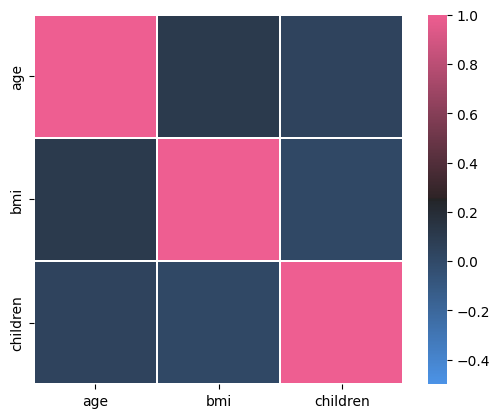

In [ ]:
corr = insurance_df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

Pearson Coefficint is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1.
In the above seaborn heatmap plot we can see:
- all diagonal elements have correlation coefficient 1 i.e thet are perfectly correlated
- bmi and age have correlation coefficient <0.3 that is they have insignificant correlation and can be cnsidiered as independent variables.

In [ ]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#To check if any null value are present
print(f'Check if any Null Value is Present:\n {insurance_df.isnull()}')
# Checking the number of null variables if any
print(f'Number of null variables:\n{insurance_df.isnull().sum()}')

Check if any Null Value is Present:
         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]
Number of null variables:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


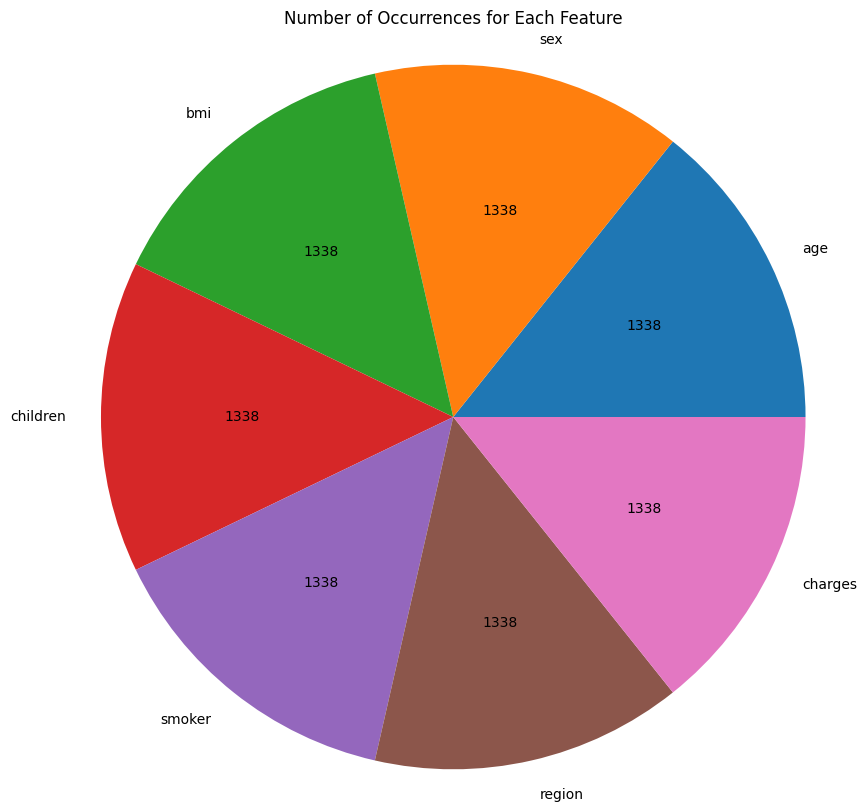

In [ ]:
# Count the number of occurrences for each feature
feature_counts = insurance_df.count()
# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(feature_counts, labels=feature_counts.index, autopct=lambda p: '{:.0f}'.
        format(p * sum(feature_counts.values)/100))
plt.title('Number of Occurrences for Each Feature')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


The Pearson correlation coefficient is a measure of the strength and direction of the linear relationship between two continuous variables. It ranges from -1 to +1 where
* -1 indicates a perfect negative linear relationship
* +1 indicates a perfect positive linear relationship
* 0 indicates no linear relationship between the variables.

Correlation coefficients whose magnitude are between 0 and 0.3 indicate variables which have a very insignificant correlation. So we can assume these variables are independent of each other

A low value for Prob(F-statistic) indicates that the null hypothesis is unlikely to be true. This means that the regression model is likely to be a good fit for the data.

In this case, the value of Prob(F-statistic) is zero, which means that the null hypothesis can be rejected with very high confidence. This means that the regression model is likely to be a good fit for the data.

In [ ]:
# Separate the target variable (charges) from the predictors
y = insurance_df['charges']
X = insurance_df.drop('charges', axis=1)

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)
print(X)
# Function to process a subset of features
def processSubset(feature_set):
    # Fit the model on the feature set
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()

    # Calculate RSS
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()

    # Calculate Cp (AIC), BIC, and adjusted R-squared
    n = len(y)
    p = len(feature_set)
    Cp = (RSS / (2 * n)) + p
    BIC = (RSS / n) + (np.log(n) * p) / n
    adj_r_squared = regr.rsquared_adj

    return {"model": regr, "RSS": RSS, "Cp": Cp, "BIC": BIC, "adj_r_squared": adj_r_squared}

# Function to get the best model for a given number of predictors
def getBest(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc - tic), "seconds.")
    return best_model

# Perform best subset selection
models_best = pd.DataFrame(columns=["RSS", "Cp", "BIC", "adj_r_squared", "model"])
tic = time.time()
for i in range(1, len(X.columns) + 1):
    models_best.loc[i] = getBest(i)
toc = time.time()
print("Total elapsed time:", (toc - tic), "seconds.")

# Print the best models and their summaries
for i, row in models_best.iterrows():
    print("Model", i)
    print(row["model"].summary())

      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900         0           1         0          0           1   
1      18  33.770         1           0         1          1           0   
2      28  33.000         3           0         1          1           0   
3      33  22.705         0           0         1          1           0   
4      32  28.880         0           0         1          1           0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3           0         1          1           0   
1334   18  31.920         0           1         0          1           0   
1335   18  36.850         0           1         0          1           0   
1336   21  25.800         0           1         0          1           0   
1337   61  29.070         0           1         0          0           1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0       

In [ ]:
# Create a list to store the model summaries
model_summaries = []

# Iterate over the models and extract the required information
for i, row in models_best.iterrows():
    model = row["model"]
    model_summary = {
        "Model": i,
        "R-squared (uncentered)": model.rsquared,
        "Adj. R-squared (uncentered)": model.rsquared_adj,
        "F-statistic": model.fvalue,
        "Prob (F-statistic)": model.f_pvalue,
        "Log-Likelihood": model.llf,
        "AIC": model.aic,
        "BIC": model.bic
    }
    model_summaries.append(model_summary)

# Create a DataFrame from the model summaries
model_summaries_df = pd.concat([pd.DataFrame(summary, index=[1]) for summary in model_summaries], ignore_index=True)

# Display the table
print(model_summaries_df)

    Model  R-squared (uncentered)  Adj. R-squared (uncentered)  F-statistic  \
0       1                0.651973                     0.651712  2504.651456   
1       2                0.871521                     0.871328  4531.282933   
2       3                0.721401                     0.720983  1728.415216   
3       4                0.747477                     0.746909  1316.230148   
4       5                0.749695                     0.748943   998.123224   
5       6                0.750430                     0.749493   801.034815   
6       7                0.750879                     0.749756   668.631310   
7       8                0.750908                     0.749597   572.771235   
8       9                0.750913                     0.749414   500.810742   
9      10                0.750913                     0.749414   500.810742   
10     11                0.750913                     0.749414   500.810742   

    Prob (F-statistic)  Log-Likelihood           AI

### Conclusion

From the above observation we can see that Model 8 has the highest adjusted R-squared value 0.8736 and a p-value of 0.0, which indicates that the model explains 87.44% of the variation in the data and there is a very low probability that this is due to change.<br>
The adjusted R-squared is a measure of the fit of the model that takes into account the number of independent variables in the model, the higher value indicates a better fit.<br>
The log likelihood is also the highest, which indicates that it is the model that is most likely to have generated the data.<br>
The F-statistics value is also the highest indicating that it is the most significant model.<br> The F-statistics is a measure of significance of the model.<br>
Finally, it has the lowest AIC or BIC value indicating it is the most simpler model.

Here are some additional details about model 8:
* The model has 8 independent variables.
* The model was fit using ordinary least squares.
* The model is significant, as the p-value for the F-statistic is very small.
* The model is a good fit for the data, as the uncentered R-squared and adjusted R-squared are both high